# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [4]:
#your code here

spaceship.shape

(8693, 14)

**Check for data types**

In [6]:
#your code here

spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [7]:
#your code here

spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [8]:
#your code here

spaceship_clean = spaceship.dropna()

In [9]:
spaceship_clean

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [10]:
#your code here

spaceship_clean['Cabin_Deck'] = spaceship_clean['Cabin'].str[0]

print(spaceship_clean['Cabin_Deck'].unique())


['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4744\4073162988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Cabin_Deck'] = spaceship_clean['Cabin'].str[0]


- Drop PassengerId and Name

In [ ]:
#your code here

spaceship_clean = spaceship_clean.drop(['PassengerId', 'Name'], axis=1)

print(spaceship_clean.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Cabin_Deck'],
      dtype='object')


- For non-numerical columns, do dummies.

In [16]:
#your code here

spaceship_final = pd.get_dummies(spaceship_clean, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck'], drop_first=True)

print(spaceship_final.head())

   Cabin   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  B/0/P  39.0          0.0        0.0           0.0     0.0     0.0   
1  F/0/S  24.0        109.0        9.0          25.0   549.0    44.0   
2  A/0/S  58.0         43.0     3576.0           0.0  6715.0    49.0   
3  A/0/S  33.0          0.0     1283.0         371.0  3329.0   193.0   
4  F/1/S  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported  HomePlanet_Europa  HomePlanet_Mars  ...  \
0        False               True            False  ...   
1         True              False            False  ...   
2        False               True            False  ...   
3        False               True            False  ...   
4         True              False            False  ...   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  Cabin_Deck_B  \
0                      False                     True     False          True   
1                      False                     T

**Perform Train Test Split**

In [19]:
#your code here

# Removing Original Cabin column before modeling
columns_to_drop = ['Cabin'] 

X = spaceship_final.drop(['Transported'] + columns_to_drop, axis=1, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [20]:
#your code here

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Initialize the models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train (Fit) the models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 3. Predict on the test set
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# 4. Compare Results
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_preds):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7859
Random Forest Accuracy: 0.8086


- Evaluate your model's performance. Comment it

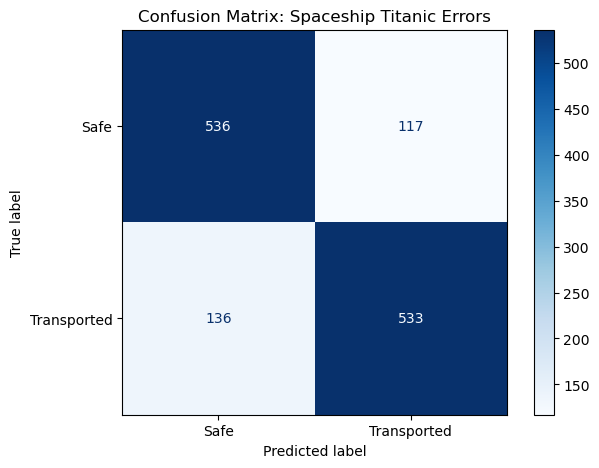

In [21]:
#your code here

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest results 
y_pred = rf_model.predict(X_test)

# Create the matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Transported'])

# Plot 
fig, ax = plt.subplots(figsize=(7, 5))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix: Spaceship Titanic Errors')
plt.show()